## Online Retail ###

taken from `https://archive.ics.uci.edu/dataset/352/online+retail`

In [56]:
#import from online repos

#pip install ucimlrepo

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from ucimlrepo import fetch_ucirepo  
 
online_retail = fetch_ucirepo(id=352) 
  
print('METADATA') 
print(online_retail.metadata) 
  
print("VARIABLES") 
print(online_retail.variables) 


KeyboardInterrupt: 

In [37]:
#dataset exploration

for k in online_retail.keys():
    for j in online_retail[k].keys():
        x= online_retail[k][j]
        if hasattr(x, 'shape'):
            print(k,j, x.shape)
        else: 
            print(k,j)

data ids (541909, 2)
data features (541909, 6)
data targets
data original (541909, 8)
data headers (8,)
metadata uci_id
metadata name
metadata repository_url
metadata data_url
metadata abstract
metadata area
metadata tasks
metadata characteristics
metadata num_instances
metadata num_features
metadata feature_types
metadata demographics
metadata target_col
metadata index_col
metadata has_missing_values
metadata missing_values_symbol
metadata year_of_dataset_creation
metadata last_updated
metadata dataset_doi
metadata creators
metadata intro_paper None
metadata additional_info None
variables name (8,)
variables role (8,)
variables type (8,)
variables demographic (8,)
variables description (8,)
variables units (8,)
variables missing_values (8,)


In [38]:
#keep the relevant features

df = online_retail['data']['features'][['Description', 'InvoiceDate', 'Quantity']]

items = df.Description.unique()
items = sorted([str(item) for item in items])

df.loc[:,'InvoiceDate'] = pd.to_datetime(df.InvoiceDate).dt.date
start, end = min(df.InvoiceDate), max(df.InvoiceDate)

df = df.groupby(['Description', 'InvoiceDate'], group_keys=False)['Quantity'].sum()

start, end

(datetime.date(2010, 12, 1), datetime.date(2011, 12, 9))

In [39]:
#fill the missing zeros

items = items[:items.index('add stock to allocate online orders')]

items_new = []
data = {}

for item in items:
    if any(df[item] < 0):
        continue
    ts = df[item].reindex(pd.date_range(start, end),fill_value=0)
    data[item] = {
        'Values' : ts.values,
        'Date' : ts.index
    }
    items_new.append(item)

len(items_new)

2489

array([ 2,  0,  0,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  3,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,
        0,  0,  0,  0,  0

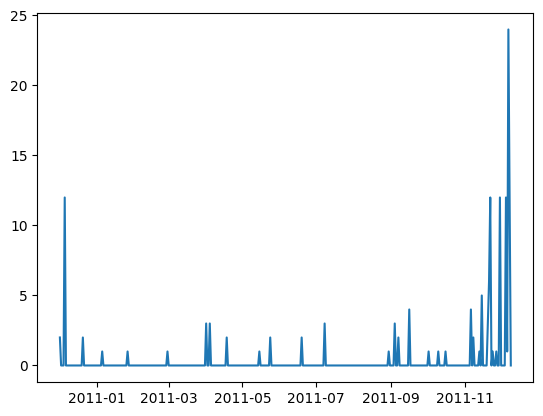

In [40]:
#just make a plot

item = list(data.keys())[0]
ts = data[item]
plt.plot(ts['Date'], ts['Values'])
ts['Values']

In [53]:
#save it into another format (.json)

df = pd.DataFrame({
    'target' : [list(data[item]['Values']) for item in items_new],
    'start' : [str(data[item]['Date'][0]) for item in items_new],
    'feat_stat_cat' : [[i] for i in range(len(items_new))]
})

path = "/Users/stefano.damato/switchdrive/Private/PhD/data/OnlineRetail/"
df.to_json(path + 'data.json')

pd.read_json(path + 'data.json')

In [60]:
#save a .csv too

pd.DataFrame(np.array([list(data[item]['Values']) for item in items_new],
                      dtype=np.int64)).to_csv(path + 'data.csv', index=False)

pd.read_csv(path + 'data.csv')

,0,1,2,3,4,5,6,7,8,9,...,364,365,366,367,368,369,370,371,372,373
0,2,0,0,0,12,0,0,0,0,0,...,12,0,0,0,0,12,1,24,12,0
1,0,0,0,0,0,0,0,0,0,0,...,1,24,1,0,2,16,0,5,1,14
2,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,8,4,6,5,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,7,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,6,0,6,12
2485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2486,5,18,3,0,16,8,7,12,21,64,...,15,26,3,0,38,24,2,12,14,50
2487,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,2,9,4


## Auto ##

taken from `https://github.com/canerturkmen/gluon-ts/tree/intermittent-datasets/datasets/intermittent_auto`

In [10]:
#get .json from url

import pandas as pd
import numpy as np

test_url = 'https://raw.githubusercontent.com/canerturkmen/gluon-ts/intermittent-datasets/datasets/intermittent_auto/test/data.json'
train_url = 'https://raw.githubusercontent.com/canerturkmen/gluon-ts/intermittent-datasets/datasets/intermittent_auto/train/data.json'

train = pd.read_json(train_url)
test = pd.read_json(test_url)

In [3]:
#just print some infos

i = 1234
print(len(train.target[i]), len(test.target[i]))
train.iloc[i,], test.iloc[i]

18 24


(start                                            2010-01-01 00:00:00
 target             [0, 0, 0, 6, 0, 4, 4, 2, 5, 6, 2, 2, 3, 10, 8,...
 feat_static_cat                                               [1234]
 Name: 1234, dtype: object,
 start                                            2010-01-01 00:00:00
 target             [0, 0, 0, 6, 0, 4, 4, 2, 5, 6, 2, 2, 3, 10, 8,...
 feat_static_cat                                               [1234]
 Name: 1234, dtype: object)

In [8]:
#save the files

path = "/Users/stefano.damato/switchdrive/Private/PhD/data/Auto/"

train.to_json(path + "train.json")
test.to_json(path + "test.json")

pd.read_json(path + "test.json")

,start,target,feat_static_cat
0,2010-01-01 00:00:00,"[2, 1, 4, 1, 1, 0, 0, 0, 3, 0, 0, 5, 5, 4, 3, ...",[0]
1,2010-01-01 00:00:00,"[1, 3, 2, 0, 6, 0, 3, 4, 4, 5, 0, 0, 5, 2, 7, ...",[1]
2,2010-01-01 00:00:00,"[1, 4, 6, 0, 1, 2, 0, 1, 3, 2, 0, 0, 11, 3, 6,...",[2]
3,2010-01-01 00:00:00,"[7, 4, 4, 0, 2, 2, 4, 0, 8, 2, 5, 2, 1, 3, 5, ...",[3]
4,2010-01-01 00:00:00,"[2, 4, 6, 1, 0, 4, 4, 6, 5, 6, 7, 9, 4, 4, 6, ...",[4]
...,...,...,...
2995,2010-01-01 00:00:00,"[0, 3, 8, 0, 7, 0, 0, 5, 1, 3, 1, 5, 6, 7, 1, ...",[2995]
2996,2010-01-01 00:00:00,"[2, 2, 0, 3, 3, 0, 1, 0, 3, 1, 1, 4, 3, 9, 7, ...",[2996]
2997,2010-01-01 00:00:00,"[2, 1, 2, 3, 3, 0, 0, 2, 0, 1, 1, 1, 3, 1, 4, ...",[2997]
2998,2010-01-01 00:00:00,"[6, 15, 18, 34, 15, 19, 18, 32, 35, 19, 56, 37...",[2998]


In [21]:
#collect it into a .csv too

data = np.empty((len(test), 24))

for i, ts in enumerate(test.target):
    data[i,] = np.array(ts, dtype=np.int64)

pd.DataFrame(data).to_csv(path + 'data.csv', index=False)

pd.read_csv(path + 'data.csv')

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,2.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,...,3.0,9.0,21.0,26.0,15.0,7.0,0.0,21.0,32.0,59.0
1,1.0,3.0,2.0,0.0,6.0,0.0,3.0,4.0,4.0,5.0,...,7.0,4.0,0.0,0.0,4.0,2.0,13.0,2.0,6.0,21.0
2,1.0,4.0,6.0,0.0,1.0,2.0,0.0,1.0,3.0,2.0,...,6.0,6.0,2.0,1.0,1.0,0.0,3.0,3.0,2.0,9.0
3,7.0,4.0,4.0,0.0,2.0,2.0,4.0,0.0,8.0,2.0,...,5.0,2.0,1.0,0.0,1.0,0.0,1.0,3.0,2.0,9.0
4,2.0,4.0,6.0,1.0,0.0,4.0,4.0,6.0,5.0,6.0,...,6.0,0.0,5.0,2.0,1.0,5.0,9.0,2.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,3.0,8.0,0.0,7.0,0.0,0.0,5.0,1.0,3.0,...,1.0,0.0,13.0,0.0,9.0,7.0,5.0,3.0,0.0,6.0
2996,2.0,2.0,0.0,3.0,3.0,0.0,1.0,0.0,3.0,1.0,...,7.0,3.0,1.0,13.0,11.0,7.0,11.0,8.0,7.0,15.0
2997,2.0,1.0,2.0,3.0,3.0,0.0,0.0,2.0,0.0,1.0,...,4.0,1.0,0.0,1.0,2.0,1.0,4.0,1.0,1.0,6.0
2998,6.0,15.0,18.0,34.0,15.0,19.0,18.0,32.0,35.0,19.0,...,0.0,6.0,6.0,55.0,0.0,3.0,24.0,3.0,4.0,33.0


## RAF ##

taken from `https://github.com/canerturkmen/gluon-ts/tree/intermittent-datasets/datasets/intermittent_raf`

In [61]:
path = "/Users/stefano.damato/switchdrive/Private/PhD/data/RAF/"

train = pd.read_json(path + 'train.json')
test = pd.read_json(path + 'test.json')
test

,start,target,feat_static_cat
0,1996-01-01 00:00:00,"[6, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[0]
1,1996-01-01 00:00:00,"[6, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[1]
2,1996-01-01 00:00:00,"[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[2]
3,1996-01-01 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",[3]
4,1996-01-01 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0,...",[4]
...,...,...,...
4995,1996-01-01 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[4995]
4996,1996-01-01 00:00:00,"[0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[4996]
4997,1996-01-01 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, ...",[4997]
4998,1996-01-01 00:00:00,"[0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ...",[4998]


In [62]:
i = 1234
print(len(train.target[i]), len(test.target[i]))
train.iloc[i,], test.iloc[i]

78 84


(start                                            1996-01-01 00:00:00
 target             [0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 18, 0, 0, 0, 0...
 feat_static_cat                                               [1234]
 Name: 1234, dtype: object,
 start                                            1996-01-01 00:00:00
 target             [0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 18, 0, 0, 0, 0...
 feat_static_cat                                               [1234]
 Name: 1234, dtype: object)

In [66]:
pd.DataFrame(np.array([ts for ts in test.target], 
                      dtype=np.int64)).to_csv(path + 'data.csv', index=False)

pd.read_csv(path + 'data.csv')

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,6,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,1,0,0,1,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,32,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,2,0,0,0
4998,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## carparts ##

In [8]:
#import the data from the original .csv

import pandas as pd
import datetime

path = "/Users/stefano.damato/switchdrive/Private/PhD/data/carparts/"

pd.read_csv(path + 'carparts.csv', sep=';', index_col=0).T.to_csv(path + 'data.csv', index=False)

pd.read_csv(path + 'data.csv')

,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,51
0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2669,6.0,6.0,5.0,0.0,2.0,1.0,3.0,1.0,5.0,5.0,...,1.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,3.0,0.0
2670,6.0,5.0,5.0,3.0,5.0,0.0,2.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2671,11.0,2.0,0.0,2.0,12.0,0.0,0.0,4.0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,2.0,0.0
2672,0.0,0.0,0.0,2.0,1.0,0.0,2.0,4.0,2.0,2.0,...,0.0,0.0,4.0,0.0,1.0,2.0,2.0,3.0,1.0,3.0


In [41]:
#save the .json

data = pd.read_csv(path + 'data.csv')

start = datetime.date(1998, 1, 1)

df_test = pd.DataFrame({
    'start' : [str(start) for i in range(len(data))],
    'target' : [list(data.iloc[i]) for i in range(len(data))],
    'feat_stat_cat' : [[i] for i in range(len(data))]
})

df_train = pd.DataFrame({
    'start' : [str(start) for i in range(len(data))],
    'target' : [list(data.iloc[i])[:-6] for i in range(len(data))],
    'feat_stat_cat' : [[i] for i in range(len(data))]
})

df_test.to_json(path + 'test.json')
df_train.to_json(path  + 'train.json')

pd.read_json(path  + 'test.json')

,start,target,feat_stat_cat
0,1998-01-01,"[42, 65, 61, 125, 95, 106, 68, 63, 98, 68, 79,...",[0]
1,1998-01-01,"[1, 2, 1, 5, 0, 8, 3, 2, 0, 5, 2, 3, 2, 1, 0, ...",[1]
2,1998-01-01,"[0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...",[2]
3,1998-01-01,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[3]
4,1998-01-01,"[1, 2, 1, 2, 0, 5, 1, 2, 0, 4, 2, 3, 1, 0, 0, ...",[4]
...,...,...,...
62,1998-01-01,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[62]
63,1998-01-01,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[63]
64,1998-01-01,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[64]
65,1998-01-01,"[0, 0, 5, 4, 0, 0, 0, 2, 4, 3, 2, 0, 5, 0, 1, ...",[65]


## Syph ##

In [83]:
#import the data from the original .csv

import pandas as pd
import datetime

path = "/Users/stefano.damato/switchdrive/Private/PhD/data/Syph/"

pd.read_csv(path + 'syph.csv', sep=';', index_col=0).T.to_csv(path + 'data.csv', index=False)

pd.read_csv(path + 'data.csv')

,1,2,3,4,5,6,7,8,9,10,...,200,201,202,203,204,205,206,207,208,209
0,42,65,61,125,95,106,68,63,98,68,...,103,67,50,53,46,79,89,43,29,48
1,1,2,1,5,0,8,3,2,0,5,...,2,3,1,6,1,4,2,2,1,2
2,0,0,0,0,0,3,0,0,0,0,...,0,1,0,0,1,2,2,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,1,2,0,5,1,2,0,4,...,1,0,0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65,0,0,5,4,0,0,0,2,4,3,...,0,3,3,4,2,0,0,0,0,0


In [135]:
#save the .json

from datetime import datetime

data = pd.read_csv(path + 'data.csv')

start = datetime(2007, 1, 1)

df_test = pd.DataFrame({
    'start' : [str(start) for i in range(len(data))],
    'target' : [list(data.iloc[i]) for i in range(len(data))],
    'feat_stat_cat' : [[i] for i in range(len(data))]
})

df_train = pd.DataFrame({
    'start' : [str(start) for i in range(len(data))],
    'target' : [list(data.iloc[i])[:-12] for i in range(len(data))],
    'feat_stat_cat' : [[i] for i in range(len(data))]
})

df_test.to_json(path + 'test.json')
df_train.to_json(path  + 'train.json')

df_test

,start,target,feat_stat_cat
0,2007-01-01 00:00:00,"[42, 65, 61, 125, 95, 106, 68, 63, 98, 68, 79,...",[0]
1,2007-01-01 00:00:00,"[1, 2, 1, 5, 0, 8, 3, 2, 0, 5, 2, 3, 2, 1, 0, ...",[1]
2,2007-01-01 00:00:00,"[0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...",[2]
3,2007-01-01 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[3]
4,2007-01-01 00:00:00,"[1, 2, 1, 2, 0, 5, 1, 2, 0, 4, 2, 3, 1, 0, 0, ...",[4]
...,...,...,...
62,2007-01-01 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[62]
63,2007-01-01 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[63]
64,2007-01-01 00:00:00,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[64]
65,2007-01-01 00:00:00,"[0, 0, 5, 4, 0, 0, 0, 2, 4, 3, 2, 0, 5, 0, 1, ...",[65]


In [136]:
?gluonts.dataset.Dataset

Init signature: gluonts.dataset.Dataset(*args, **kwargs)
Docstring:     
Base class for protocol classes.

Protocol classes are defined as::

    class Proto(Protocol):
        def meth(self) -> int:
            ...

Such classes are primarily used with static type checkers that recognize
structural subtyping (static duck-typing), for example::

    class C:
        def meth(self) -> int:
            return 0

    def func(x: Proto) -> int:
        return x.meth()

    func(C())  # Passes static type check

See PEP 544 for details. Protocol classes decorated with
@typing.runtime_checkable act as simple-minded runtime protocols that check
only the presence of given attributes, ignoring their type signatures.
Protocol classes can be generic, they are defined as::

    class GenProto(Protocol[T]):
        def meth(self) -> T:
            ...
File:           ~/Library/Python/3.9/lib/python/site-packages/gluonts/dataset/__init__.py
Type:           _ProtocolMeta
Subclasses:     